In [1]:
import numpy as np
import matplotlib
import math
from matplotlib import pylab as plt
import pandas as pd
import scipy
from matplotlib import animation

from tqdm import tqdm

%matplotlib notebook

# ENO схема

Линейное уравнение

In [13]:
#задаем параметры
L = 5
c = 0.1
f0 = 1
f1 = 0
x_step = 0.001
x_len = np.arange(0, 0.5, x_step)
t_step = 0.5*x_step/f0
a = c*x_step/t_step
#a = 0.75
t_len = np.arange(0, 50, t_step)
f = np.zeros((len(x_len) + 3, len(t_len)))
f_nonlin = np.zeros((len(x_len) +3 , len(t_len)))
f_true = np.zeros((len(x_len + 3), len(t_len)))

f[0,:] = f1
f[:L,0] = f0



Ymm = 0
Ym = 0
Yp = 0
Ypp = 0
f_plus = 0
f_minus = 0

Точное решение

In [14]:
for n in (range(len(t_len))) :
    for i in range(len(x_len)) :
        if  a*t_len[n] >  x_len[i]:
            f_true[i,n] = f0
        else:
            f_true[i,n] = f1 
f_true[len(x_len):, :] = f0

Вычисление

In [15]:
for n in (range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        if 0 < x_len[i] < L:
            f[i,n] = f1
        elif x_len[i] == 0:
            f[i,n] = f0
        else:
            f[i,n] = 0
f[len(x_len):, :] = f0

In [16]:
def S(q, f1, f2):
    return 0.5*(1+q)*f1+0.5*(1-q)*f2
def N(q, f1, f2):
    return 0.5*(3-q)*f1-0.5*(1-q)*f2


for n in tqdm(range(0, len(t_len) - 1)):
    for j in range(1, len(x_len)+ 1):
        Ymm = np.abs(f[j-1][n]-f[j-2][n])
        Ym  = np.abs(f[j][n]-f[j-1][n])
        Yp  = np.abs(f[j+1][n]-f[j][n])
        Ypp = np.abs(f[j+2][n]-f[j+1][n])
        if (Yp >= Ym):
            f_plus  = N(c, f[j][n], f[j-1][n])
            f_minus = N(c, f[j-1][n], f[j-2][n])
        else:
            f_plus  = S(c, f[j][n], f[j+1][n])
            f_minus = S(c, f[j-1][n], f[j][n])
        f[j][n+1] = f[j][n] - c*(f_plus - f_minus)

100%|████████████████████████████████████████████████████████████████████████████| 99999/99999 [17:54<00:00, 93.10it/s]


<IPython.core.display.Javascript object>


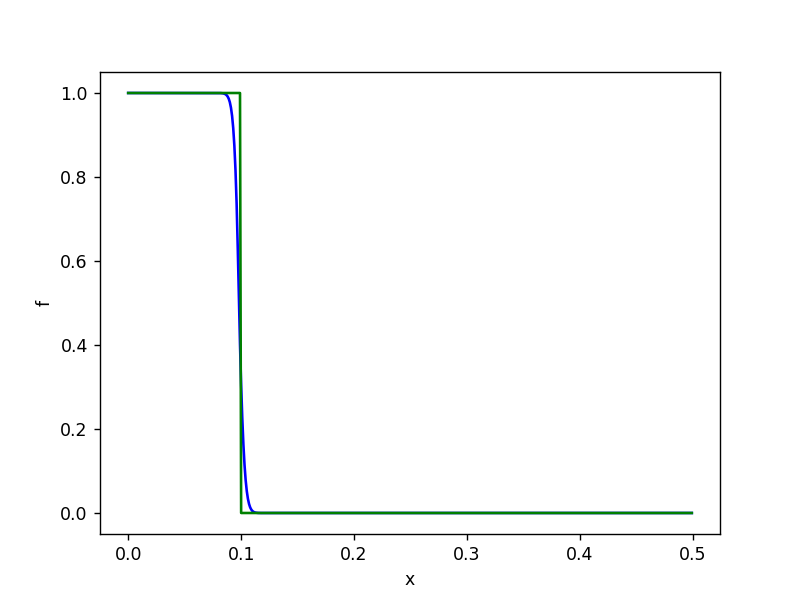

In [20]:
plt.figure()
#plt.title('Absorption cross-section')
plt.ylabel('f')
plt.xlabel('x')
plt.plot(x_len, f[:len(x_len), 1000], 'b')
plt.plot(x_len, f_true[:len(x_len), 1000], 'g')
plt.show()

In [24]:
print(len(x_len), len(t_len), t_step)

500 100000 0.0005


<IPython.core.display.Javascript object>


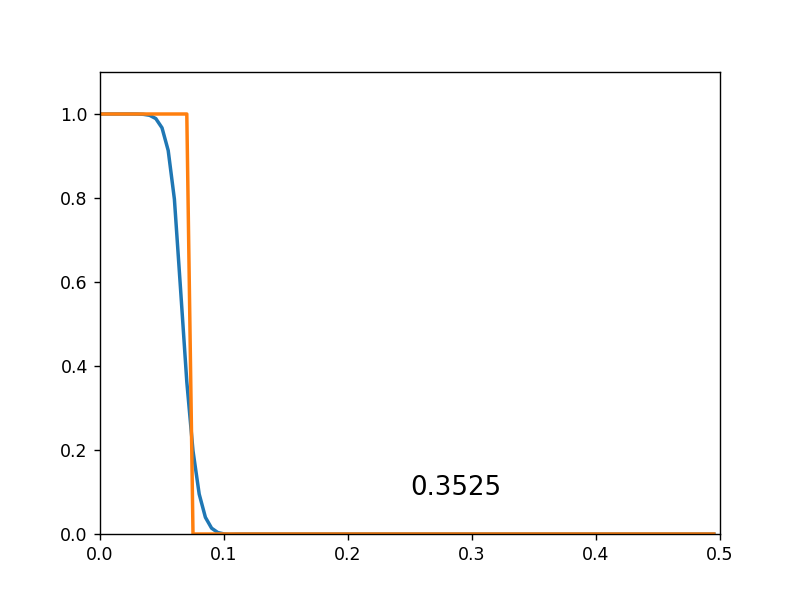

In [18]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(0, 0.5), ylim=(0, 1.1))
line, = ax.plot([], [], lw=2)
line_tue, = ax.plot([], [], lw=2)

time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_tue.set_data([], [])
    return line,line_tue

# animation function.  This is called sequentially
def animate(i):
    f_t = f[:len(x_len), i]
    f_true_t = f_true[:len(x_len), i]
    line.set_data(x_len, f_t)
    line_tue.set_data(x_len, f_true_t)
    
    time_stamp.set_text(t_len[i])
    return line,line_tue,time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=False, repeat=True)

plt.show()

# Нелинейное уравнение

In [25]:
L = 5
c = 0.5
f0 = 1
f1 = 0
x_step = 0.005
x_len = np.arange(0, 0.5, x_step)
t_step = c*x_step/f0
a = c*x_step/t_step
#a = 0.75
t_len = np.arange(0, 20, t_step)
f_nonlin = np.zeros((len(x_len) +3 , len(t_len)))
f_nonlin_true = np.zeros((len(x_len + 3), len(t_len)))

f_nonlin[0,:] = f1
f_nonlin[:L,0] = f0



Ymm = 0
Ym = 0
Yp = 0
Ypp = 0
f_nonlin_plus = 0
f_nonlin_minus = 0

In [26]:
for n in (range(len(t_len))) :
    for i in range(len(x_len)) :
        if  c*t_len[n] >  x_len[i]:
            f_nonlin_true[i,n] = f0
        else:
            f_nonlin_true[i,n] = f1 
f_nonlin_true[len(x_len):, :] = f0

In [27]:
for n in (range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        if 0 < x_len[i] < L:
            f_nonlin[i,n] = f1
        elif x_len[i] == 0:
            f_nonlin[i,n] = f0
        else:
            f_nonlin[i,n] = 0
f_nonlin[len(x_len):, :] = f0

In [28]:
def S(q, f1, f2):
    return 0.5*(1+q)*f1+0.5*(1-q)*f2
def N(q, f1, f2):
    return 0.5*(3-q)*f1-0.5*(1-q)*f2


for n in tqdm(range(0, len(t_len) - 1)):
    for j in range(1, len(x_len) +1):
        Ymm = np.abs(f_nonlin[j-1][n]**2-f_nonlin[j-2][n]**2)
        Ym  = np.abs(f_nonlin[j][n]**2-f_nonlin[j-1][n]**2)
        Yp  = np.abs(f_nonlin[j+1][n]**2-f_nonlin[j][n]**2)
        Ypp = np.abs(f_nonlin[j+2][n]**2-f_nonlin[j+1][n]**2)
        if (Yp >= Ym):
            f_nonlin_plus  = N(c, 0.5*f_nonlin[j][n]**2, 0.5*f_nonlin[j-1][n]**2)
            f_nonlin_minus = N(c, 0.5*f_nonlin[j-1][n]**2, 0.5*f_nonlin[j-2][n]**2)
        else:
            f_nonlin_plus  = S(c, 0.5*f_nonlin[j][n]**2, 0.5*f_nonlin[j+1][n]**2)
            f_nonlin_minus = S(c, 0.5*f_nonlin[j-1][n]**2, 0.5*f_nonlin[j][n]**2)
        f_nonlin[j][n+1] = f_nonlin[j][n] - c*(f_nonlin_plus - f_nonlin_minus)

100%|█████████████████████████████████████████████████████████████████████████████| 7999/7999 [00:20<00:00, 385.81it/s]


Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


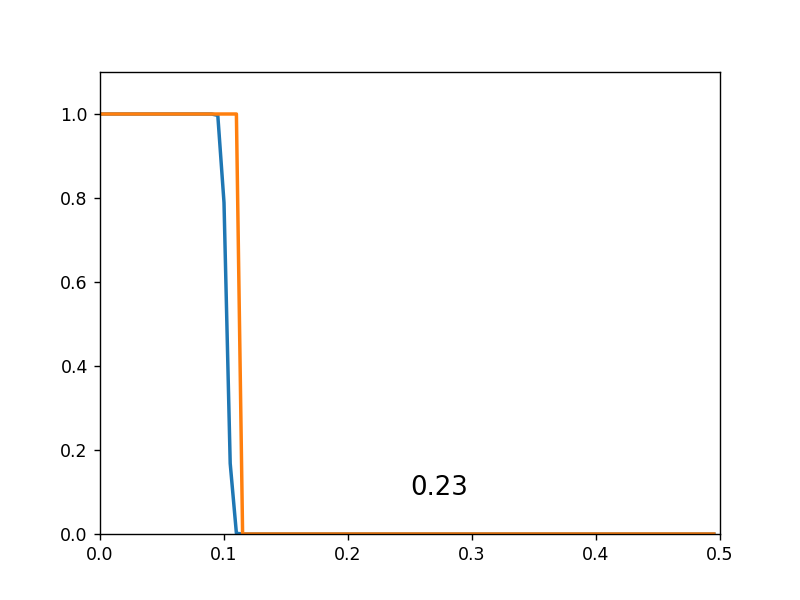

In [29]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(0, 0.5), ylim=(0, 1.1))
line, = ax.plot([], [], lw=2)
line_tue, = ax.plot([], [], lw=2)

time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_tue.set_data([], [])
    return line,line_tue

# animation function.  This is called sequentially
def animate(i):
    f_t = f_nonlin[:len(x_len), i]
    f_true_t = f_nonlin_true[:len(x_len), i]
    line.set_data(x_len, f_t)
    line_tue.set_data(x_len, f_true_t)
    
    time_stamp.set_text(t_len[i])
    return line,line_tue,time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=False, repeat=True)

plt.show()